In [1]:
# We mount google drive to save the model
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# We create a backup folder to save the weights
!mkdir -p /content/drive/MyDrive/OpenCVProject/backup

In [3]:
# We download the code + dataset
# This ZIP file contains the trained YoloV4 model, whose mAP is of 79.17%
# and it has been trained with 6000 epochs for 2 classes, and a learning rate
# of 0.0001. The backbone used is the yolov4.conv.137
# The model has been trained in a local machine, due to Google Colab
# training time limitations. The output model is in the folder
# model/yolov4-train_best.weights
%cd /content
!rm -rf dataset model test_images test_videos
!wget https://www.dropbox.com/s/6naqiywqz028m29/OpenCV_YoloV4.zip?dl=0 -O /content/project.zip
!unzip /content/project.zip -d /content/
!unzip /content/mask_nomask_dataset.zip -d /content/dataset
!rm -rf /content/project.zip
!rm -rf /content/mask_nomask_dataset.zip

/content
--2022-09-03 05:57:57--  https://www.dropbox.com/s/6naqiywqz028m29/OpenCV_YoloV4.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/6naqiywqz028m29/OpenCV_YoloV4.zip [following]
--2022-09-03 05:57:58--  https://www.dropbox.com/s/raw/6naqiywqz028m29/OpenCV_YoloV4.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc68f1eadd060eade486f120c464.dl.dropboxusercontent.com/cd/0/inline/BsMUJO_MWUUi_CS1zyT0p-H59e5In_56hwPiq1j7R4ljdxMnyRf6NE8yWKjtlMnAHj7xwPyAOmCPE_FD2I-Jut0UQBeqiyZ6fQIDyW804nOKe3ZJvqHsde7z3Tu2Agi7obO9WAs9QvqcQiH0slJPlVAUjIvPuDqG82UNakDxBtK1rw/file# [following]
--2022-09-03 05:57:59--  https://uc68f1eadd060eade486f120c464.dl.dropboxusercontent.com/cd/0/inline/BsMUJO_MWUUi_CS1zyT0p-H59e5In_56hwPiq1j7R4ljdxMnyR

In [4]:
# We clone and compile the DarkNet framework
!git clone https://github.com/AlexeyAB/darknet.git /content/darknet
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make -j12

Cloning into '/content/darknet'...
remote: Enumerating objects: 15490, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 15490 (delta 10), reused 21 (delta 9), pack-reused 15460
Receiving objects: 100% (15490/15490), 14.08 MiB | 13.39 MiB/s, done.
Resolving deltas: 100% (10398/10398), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -W

In [5]:
# We train the model Yolov4
%cd /content/darknet
!./darknet detector train ../model/yolov4.data ../model/yolov4-train.cfg  ../model/yolov4-train_best.weights -dont_show -map 2> ../train_log.txt

/content/darknet


In [6]:
# Function to show input vs predicted image:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

In [ ]:
# We run the OD on the test images provided.
%cd /content/darknet
!mkdir -p /content/results/
!./darknet detector test ../model/yolov4.data ../model/yolov4-train.cfg  ../model/yolov4-train_best.weights ../test_images/test-image1.jpg -thresh .5

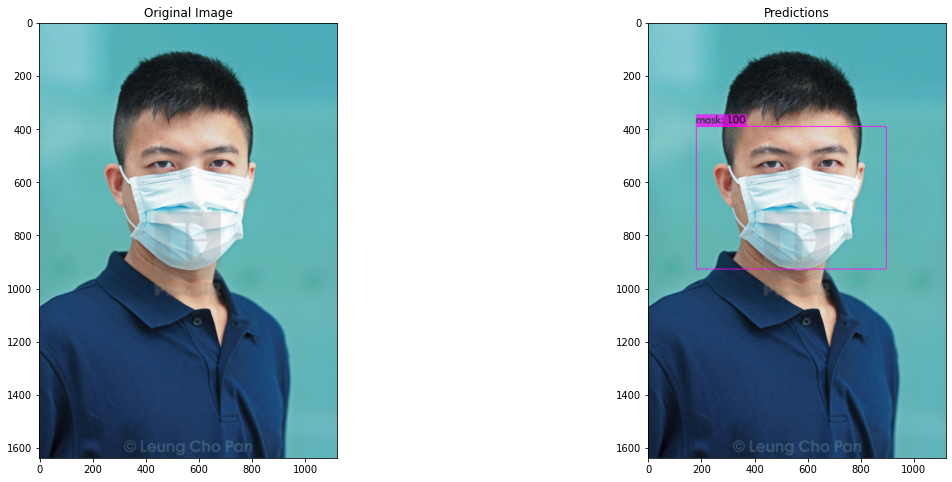

In [8]:
display_output("../test_images/test-image1.jpg")
!mv /content/darknet/predictions.jpg /content/results/test-image1.jpg

In [9]:
!./darknet detector test ../model/yolov4.data ../model/yolov4-train.cfg  ../model/yolov4-train_best.weights ../test_images/test-image2.jpg -thresh .5

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x

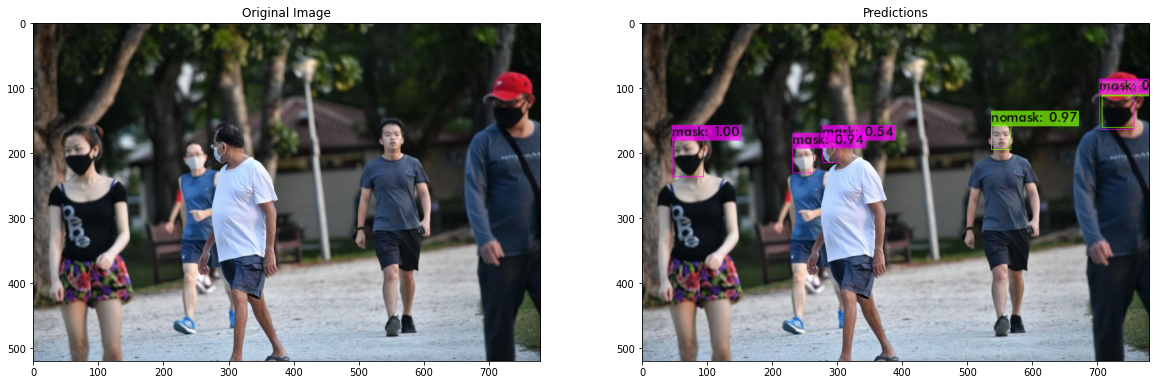

In [10]:
display_output("../test_images/test-image2.jpg")
!mv /content/darknet/predictions.jpg /content/results/test-image2.jpg

In [ ]:
!./darknet detector test ../model/yolov4.data ../model/yolov4-train.cfg  ../model/yolov4-train_best.weights ../test_images/test-image3.jpg -thresh .5

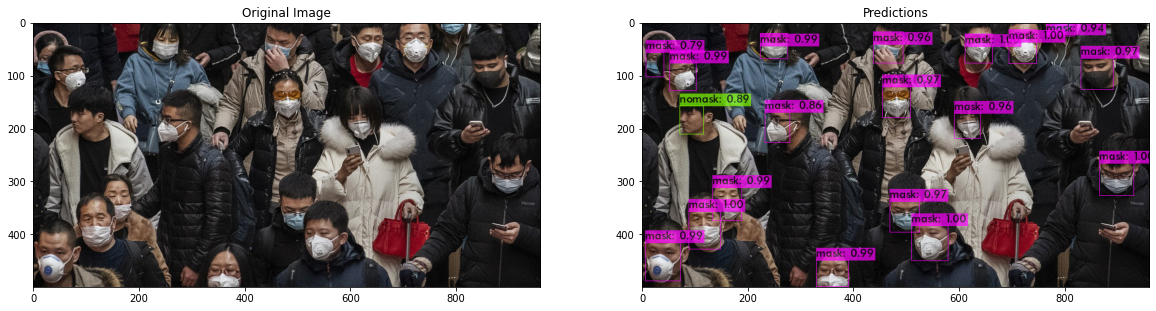

In [12]:
display_output("../test_images/test-image3.jpg")
!mv /content/darknet/predictions.jpg /content/results/test-image3.jpg

In [ ]:
!./darknet detector test ../model/yolov4.data ../model/yolov4-train.cfg  ../model/yolov4-train_best.weights ../test_images/test-image4.jpg -thresh .5

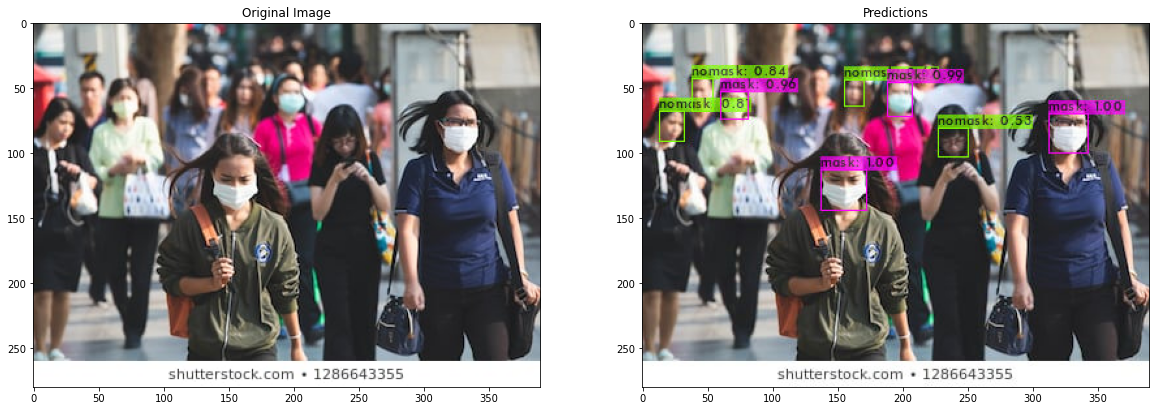

In [14]:
display_output("../test_images/test-image4.jpg")
!mv /content/darknet/predictions.jpg /content/results/test-image4.jpg

In [ ]:
# We run the OD on the two test videos.
!./darknet detector demo ../model/yolov4.data ../model/yolov4-train.cfg  ../model/yolov4-train_best.weights ../test_videos/test-video1.mp4 -thresh .5 -out_filename out-vid3.avi -dont_show

In [ ]:
!./darknet detector demo ../model/yolov4.data ../model/yolov4-train.cfg  ../model/yolov4-train_best.weights ../test_videos/test-video2.mp4 -thresh .5 -out_filename out-vid4.avi -dont_show